8.0


In [82]:
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

cv2.__version__

'4.1.2'

8.1

In [0]:
image = cv2.imread("shark.jpg", cv2.IMREAD_GRAYSCALE)

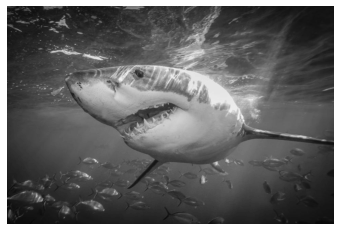

In [3]:
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [7]:
type(image)

numpy.ndarray

In [8]:
image

array([[77, 74, 71, ..., 20, 21, 21],
       [76, 74, 72, ..., 21, 21, 21],
       [80, 81, 81, ..., 21, 22, 22],
       ...,
       [15, 16, 18, ..., 14, 14, 14],
       [13, 15, 17, ..., 13, 13, 13],
       [12, 14, 16, ..., 12, 12, 12]], dtype=uint8)

In [9]:
image.shape

(640, 960)

In [10]:
image[0,0]

77

In [11]:
image_color = cv2.imread("shark.jpg", cv2.IMREAD_COLOR)

image_color[0,0]

array([58, 74, 91], dtype=uint8)

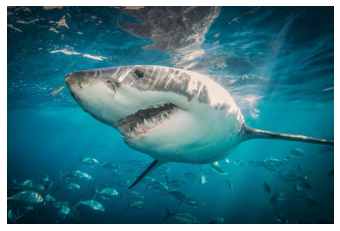

In [12]:
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()

8.2

In [13]:
cv2.imwrite("cvsave_shark.jpg", image)

True

8.3


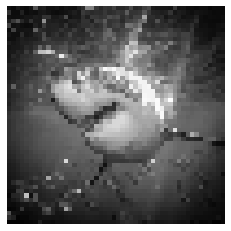

In [14]:
icon_image = cv2.imread("icon_shark.jpg", cv2.IMREAD_GRAYSCALE)

image_50x50 = cv2.resize(image, (50,50))

plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

8.4


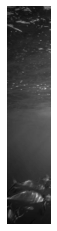

In [22]:
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

8.5


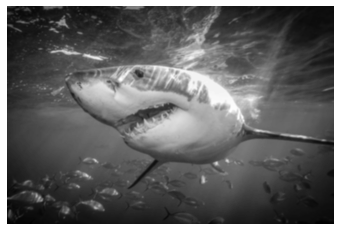

In [26]:
image_blurry = cv2.blur(image, (5,5))

plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

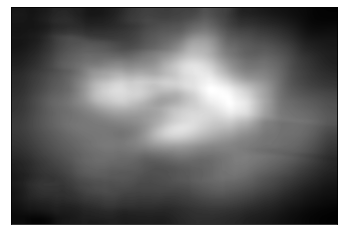

In [29]:
image_very_blurry = cv2.blur(image, (100,100))

plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
kernel = np.ones((5,5)) /25.0

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

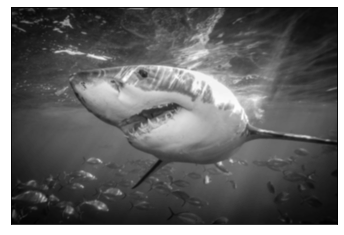

In [31]:
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

8.6

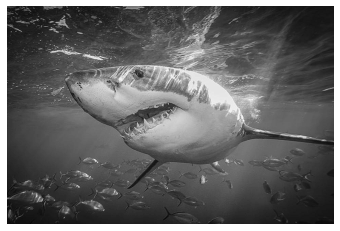

In [32]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
 
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

8.7

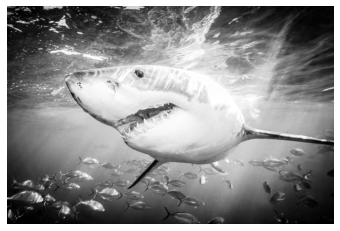

In [35]:
image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

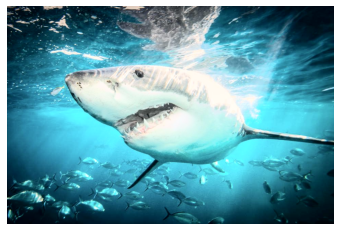

In [36]:
image_bgr = cv2.imread("shark.jpg")

image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()

8.8

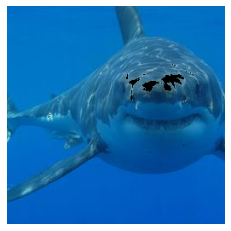

In [50]:
image_bgr = cv2.imread('icon_shark.jpeg')

image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis("off")
plt.show()


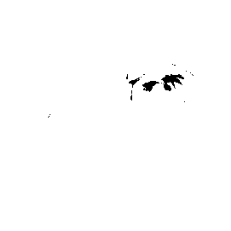

In [51]:
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

8.9

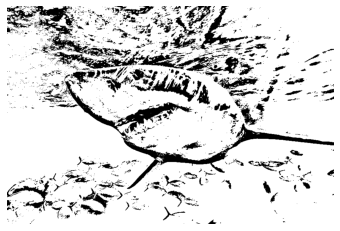

In [47]:
image_grey = cv2.imread("shark.jpg", cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size, 
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

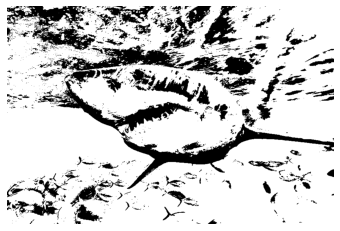

In [48]:
image_mean_threshold = cv2.adaptiveThreshold(image_grey, 
                                             max_output_value, 
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

8.10


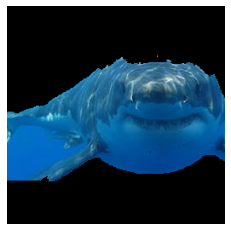

In [54]:
image_bgr = cv2.imread('icon_shark.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0, 56, 256, 150)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

mask_2 = np.where((mask == 2) | (mask == 0), 0 , 1).astype('uint8')

image_rgb_nogb = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nogb), plt.axis("off")
plt.show()

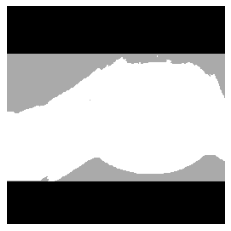

In [57]:
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

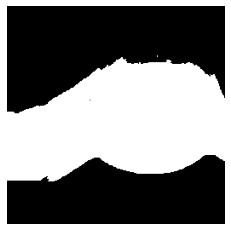

In [58]:
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

8.11

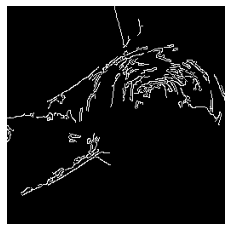

In [59]:
image_grey = cv2.imread('icon_shark.jpeg', cv2.IMREAD_GRAYSCALE)
median_intensity = np.median(image_grey)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(max(255, (1.0 + 0.33) * median_intensity))

image_canny = cv2.Canny(image_grey, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray'), plt.axis("off")
plt.show()

8.12

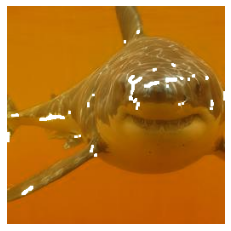

In [63]:
image_bgr = cv2.imread("icon_shark.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_grey,
                                      block_size, 
                                      aperture, 
                                      free_parameter)

detector_responses = cv2.dilate(detector_responses, None)

threshold = 0.02
image_bgr[detector_responses > 
          threshold * 
          detector_responses.max()] = [255, 255, 255]

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_bgr, cmap="gray"), plt.axis("off")
plt.show()

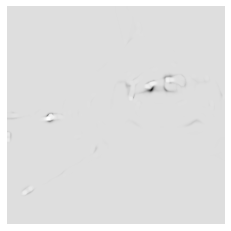

In [65]:
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

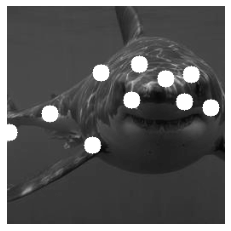

In [67]:
image_bgr = cv2.imread("icon_shark.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray, 
                                  corners_to_detect,
                                  minimum_quality_score, 
                                  minimum_distance)

corners = np.float32(corners)

for corner in corners:
  x, y = corner[0]
  cv2.circle(image_bgr, (x, y), 10, (255, 255, 255), -1)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

8.13

In [69]:
image = cv2.imread("shark.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10,10))

image_10x10.flatten()

array([ 26,  36,  41,  56,  62,  66,  54,  41,  32,  24,  34,  47,  54,
        56, 104, 108,  71,  69,  61,  40,  45,  72, 105,  89,  97, 193,
       123,  80,  78,  46,  59,  86, 162, 154, 165, 132, 173, 118,  72,
        65,  65,  91, 128, 172, 146, 167, 179, 188,  99,  90,  71,  90,
       108,  90, 193, 191, 160, 113, 105,  85,  60,  85,  96, 104, 110,
        99, 100, 115,  98,  66,  45,  64,  86,  89,  63,  97,  81,  98,
        77,  54,  63,  45,  59,  70,  71,  77,  83,  69,  49,  35,  27,
        31,  34,  42,  44,  58,  54,  44,  32,  24], dtype=uint8)

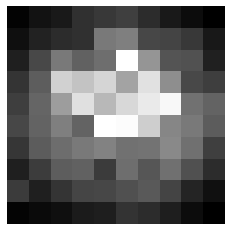

In [85]:
plt.imshow(image_10x10, cmap='gray'), plt.axis("off")
plt.show()

In [71]:
image_10x10.shape

(10, 10)

In [72]:
image_10x10.flatten().shape

(100,)

In [73]:
image_color = cv2.imread("icon_shark.jpeg", cv2.IMREAD_COLOR)

image_color_10x10 = cv2.resize(image_color, (10,10))

image_color_10x10.flatten().shape

(300,)

In [74]:
image_256x256_gray = cv2.imread("icon_shark.jpeg", cv2.IMREAD_GRAYSCALE)

image_256x256_gray.flatten().shape

(65536,)

In [75]:
image_256x256_color = cv2.imread("icon_shark.jpeg", cv2.IMREAD_COLOR)

image_256x256_color.flatten().shape

(196608,)

8.14

In [76]:
image_bgr = cv2.imread("icon_shark.jpeg", cv2.IMREAD_COLOR)

channels = cv2.mean(image_bgr)

obervation = np.array([(channels[2], channels[1], channels[0])])

obervation

array([[ 11.52804565, 102.75045776, 174.95768738]])

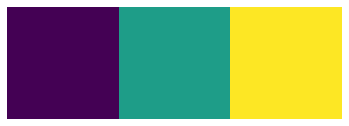

In [77]:
plt.imshow(obervation), plt.axis("off")
plt.show()

8.15

In [79]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

features = []

colors = ("r", "g", "b")

for i, channel in enumerate(colors):
  histogram = cv2.calcHist([image_rgb],
                           [i],
                           None,
                           [256],
                           [0, 256])
  features.extend(histogram)

obervation = np.array(features).flatten()

obervation[0:5]

array([19603., 12459.,  7836.,  2783.,  1401.], dtype=float32)

In [80]:
image_rgb[0,0]

array([  1, 107, 195], dtype=uint8)

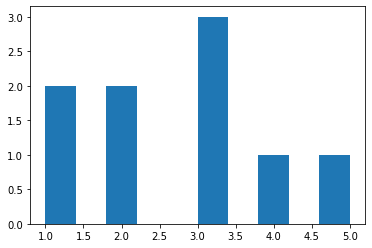

In [83]:
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

data.hist(grid=False)
plt.show()

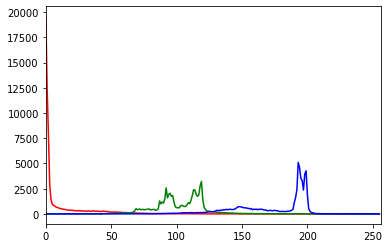

In [86]:
colors = ("r","g","b")

for i, channel in enumerate(colors):
  histogram = cv2.calcHist([image_rgb],
                           [i],
                           None, 
                           [256],
                           [0, 256])
  plt.plot(histogram, color = channel)
  plt.xlim([0, 256])

plt.show()

20.15

In [93]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


K.set_image_data_format("channels_first")

np.random.seed(0)

channels = 1
height = 28 
width = 28

(data_train, target_train), (data_test, target_test) = mnist.load_data()

data_train = data_train.reshape(data_train.shape[0], channels, height, width)

data_test = data_test.reshape(data_test.shape[0], channels, height, width)

features_train = data_train / 255
features_test = data_test / 255

target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

network = Sequential()

network.add(Conv2D(filters = 64, 
                   kernel_size = (5, 5), 
                   input_shape = (channels, width, height),
                   activation = 'relu'))

network.add(MaxPooling2D(pool_size = (2, 2)))

network.add(Dropout(0.5))

network.add(Flatten())

network.add(Dense(128, activation='relu'))

network.add(Dropout(0.5))

network.add(Dense(number_of_classes, activation="softmax"))

network.compile(loss="categorical_crossentropy", 
                optimizer="rmsprop", 
                metrics=["accuracy"])

network.fit(features_train,
            target_train,
            epochs = 2,
            verbose = 0,
            batch_size = 1000,
            validation_data = (features_test, target_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


